# Exploratory Data Analysis

This notebook file aims to present an exploratory data analysis of the following problem: house pricing. This analysis is divided into five parts:

1. Exploratory analysis
    * Data structure
    * Descritive statistics
2. Data modeling
4. Metrics
5. Conclusions

## Exploratory Analysis

### Understanding data structure

In [2]:
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [4]:
df = pd.read_csv("ames_train.csv", sep=";")

In [10]:
df.head()

,Unnamed: 0,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,40000,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,40001,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,40002,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,40003,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,40004,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


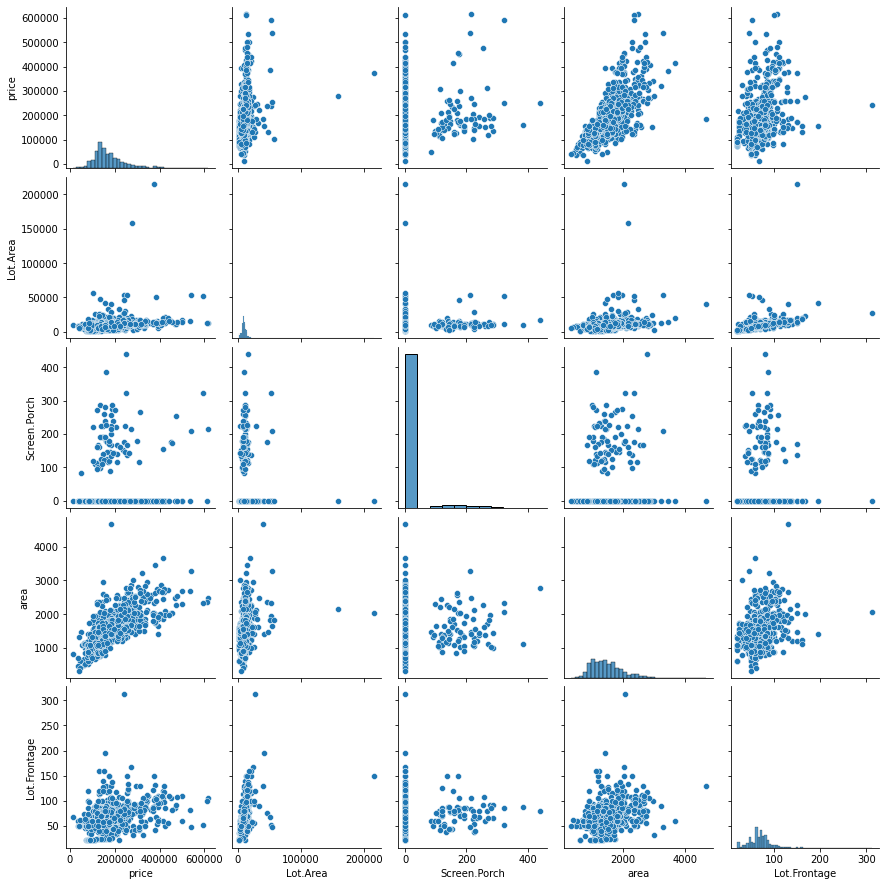

In [22]:
sns.pairplot(df[['price', 'Lot.Area', 'Screen.Porch', 'area', 'Lot.Frontage']])

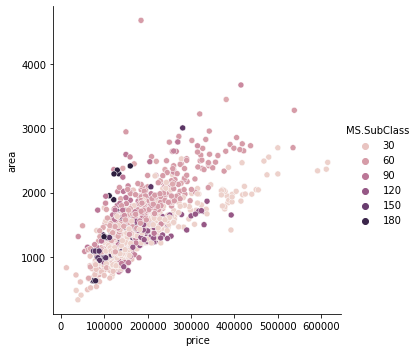

In [24]:
sns.relplot(x = 'price', y='area', hue='MS.SubClass', data=df)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(auto.corr(),cbar=True)

## Data Modeling

In [4]:
newdf.isnull().sum().sum()numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf = df.select_dtypes(include=numerics)
newdf = newdf.iloc[: , 2:]
nan_columns = newdf.loc[:, newdf.isna().any()]
newdf.fillna(0, inplace=True)


SyntaxError: invalid syntax (455368201.py, line 1)

In [ ]:
x = newdf.drop(['price'], axis=1).values
y = newdf['price'].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)
ml=LinearRegression()
ml.fit(x_train,y_train)
y_pred = ml.predict(x_test)


## Conclusions